In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from wordcloud import WordCloud  

In [2]:
# Loading the datasets
job_skills = pd.read_csv('job_skills.csv')  
job_summary = pd.read_csv('job_summary.csv')  
linkedin_jobs = pd.read_csv('linkedin_job_postings.csv') 

In [3]:
print("Job Skills:")
print(job_skills.head())

print("\nJob Summary:")
print(job_summary.head())

print("\nJob Postings:")
print(linkedin_jobs.head())

Job Skills:
                                            job_link  \
0  https://www.linkedin.com/jobs/view/housekeeper...   
1  https://www.linkedin.com/jobs/view/assistant-g...   
2  https://www.linkedin.com/jobs/view/school-base...   
3  https://www.linkedin.com/jobs/view/electrical-...   
4  https://www.linkedin.com/jobs/view/electrical-...   

                                          job_skills  
0  Building Custodial Services, Cleaning, Janitor...  
1  Customer service, Restaurant management, Food ...  
2  Applied Behavior Analysis (ABA), Data analysis...  
3  Electrical Engineering, Project Controls, Sche...  
4  Electrical Assembly, Point to point wiring, St...  

Job Summary:
                                            job_link  \
0  https://www.linkedin.com/jobs/view/restaurant-...   
1  https://www.linkedin.com/jobs/view/med-surg-re...   
2  https://www.linkedin.com/jobs/view/registered-...   
3  https://uk.linkedin.com/jobs/view/commercial-a...   
4  https://www.linkedin.com

In [4]:
merged_data = pd.merge(linkedin_jobs, job_skills, on='job_link', how='left')  
merged_data = pd.merge(merged_data, job_summary, on='job_link', how='left')  

print("Merged Dataset:")
print(merged_data)  

print("\n 5v rows of the Merged Dataset:")
print(merged_data.head())

print("Columns in the Merged Dataset:")
print(merged_data.columns)

Merged Dataset:
                                                  job_link  \
0        https://www.linkedin.com/jobs/view/account-exe...   
1        https://www.linkedin.com/jobs/view/registered-...   
2        https://www.linkedin.com/jobs/view/restaurant-...   
3        https://www.linkedin.com/jobs/view/independent...   
4        https://www.linkedin.com/jobs/view/group-unit-...   
...                                                    ...   
1348449  https://www.linkedin.com/jobs/view/registered-...   
1348450  https://www.linkedin.com/jobs/view/constructio...   
1348451  https://www.linkedin.com/jobs/view/executive-c...   
1348452  https://www.linkedin.com/jobs/view/rn-register...   
1348453  https://www.linkedin.com/jobs/view/on-demand-g...   

                   last_processed_time got_summary got_ner is_being_worked  \
0         2024-01-21 07:12:29.00256+00           t       t               f   
1         2024-01-21 07:39:58.88137+00           t       t               f   
2    

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(merged_data.isnull().sum()) 



Missing Values in Each Column:
job_link                   0
last_processed_time        0
got_summary                0
got_ner                    0
is_being_worked            0
job_title                  0
company                   11
job_location              19
first_seen                 0
search_city                0
search_country             0
search_position            0
job_level                  0
job_type                   0
job_skills             54158
job_summary            51122
dtype: int64


In [6]:
print("Merged Dataset Shape:", merged_data.shape) 
print(merged_data.head())  

Merged Dataset Shape: (1348454, 16)
                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   
2  https://www.linkedin.com/jobs/view/restaurant-...   
3  https://www.linkedin.com/jobs/view/independent...   
4  https://www.linkedin.com/jobs/view/group-unit-...   

             last_processed_time got_summary got_ner is_being_worked  \
0   2024-01-21 07:12:29.00256+00           t       t               f   
1   2024-01-21 07:39:58.88137+00           t       t               f   
2  2024-01-21 07:40:00.251126+00           t       t               f   
3  2024-01-21 07:40:00.308133+00           t       t               f   
4  2024-01-19 09:45:09.215838+00           f       f               f   

                                           job_title  \
0  Account Executive - Dispensing (NorCal/Norther...   
1                 Registered Nurse - RN Care Manager   
2               RESTAURANT

In [7]:
print(" Statistics: ")
print(merged_data.describe()) 

 Statistics: 
                                                 job_link  \
count                                             1348454   
unique                                            1348454   
top     https://www.linkedin.com/jobs/view/account-exe...   
freq                                                    1   

                  last_processed_time got_summary  got_ner is_being_worked  \
count                         1348454     1348454  1348454         1348454   
unique                         722748           2        2               2   
top     2024-01-19 09:45:09.215838+00           t        t               f   
freq                           625540     1297877  1296401         1346978   

                      job_title          company  job_location  first_seen  \
count                   1348454          1348443       1348435     1348454   
unique                   584544            90605         29153           6   
top     LEAD SALES ASSOCIATE-FT  Health eCareers  New Y

In [8]:
print("\nUnique Job Titles:", merged_data['job_title'].nunique())  
print("Unique Companies:", merged_data['company'].nunique())  
print("Unique Locations:", merged_data['job_location'].nunique()) 


Unique Job Titles: 584544
Unique Companies: 90605
Unique Locations: 29153


In [9]:
merged_data = merged_data.dropna(subset=['job_title', 'company', 'job_location'])

merged_data['job_skills'] = merged_data['job_skills'].apply(lambda x: x.split(", ") if pd.notnull(x) else [])

merged_data['job_title'] = merged_data['job_title'].str.lower()  
merged_data['company'] = merged_data['company'].str.lower() 
merged_data['job_location'] = merged_data['job_location'].str.lower()

In [10]:
duplicate_rows = merged_data[merged_data.duplicated(subset=merged_data.columns.difference(['job_skills']))]

print("Number of Duplicate Rows:", duplicate_rows.shape[0])

if duplicate_rows.shape[0] > 0:
    print("\nFirst Few Duplicate Rows:")
    print(duplicate_rows.head())
else:
    print("\nNo duplicate rows found.")

Number of Duplicate Rows: 0

No duplicate rows found.


In [11]:
merged_data = merged_data.dropna(subset=['job_summary'])

missing_values = merged_data.isnull().sum()
print(" Handling missing values: ")
print(missing_values.to_string())

 Handling missing values: 
job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             0
job_summary            0


/var/folders/sr/fhmynx096tj9ll1v797d66rw0000gn/T/ipykernel_27563/3035412091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')


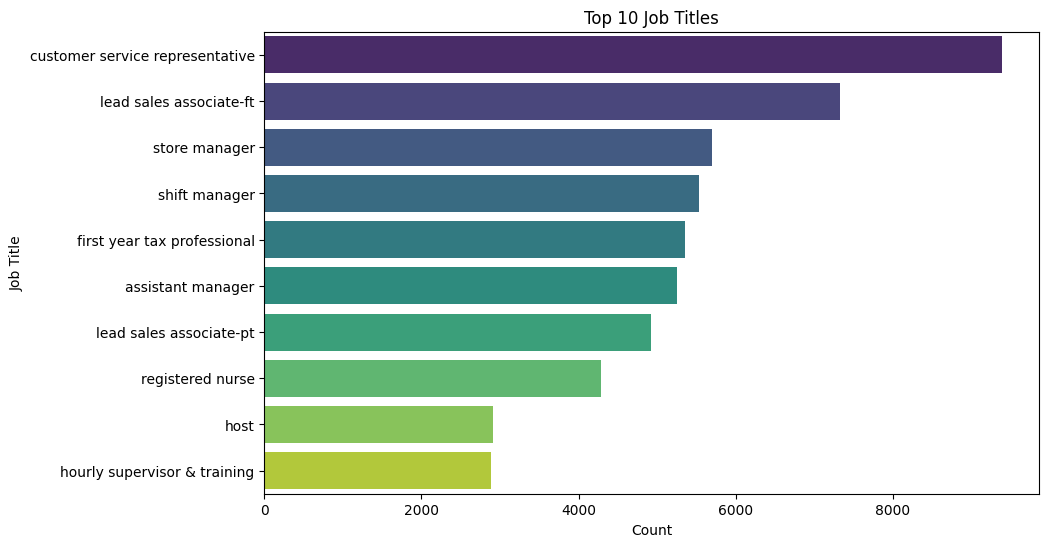

In [12]:
top_job_titles = merged_data['job_title'].value_counts().nlargest(10)  
plt.figure(figsize=(10, 6))  
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')  
plt.title('Top 10 Job Titles')  
plt.xlabel('Count')  
plt.ylabel('Job Title')  
plt.show()  

/var/folders/sr/fhmynx096tj9ll1v797d66rw0000gn/T/ipykernel_27563/4197883429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


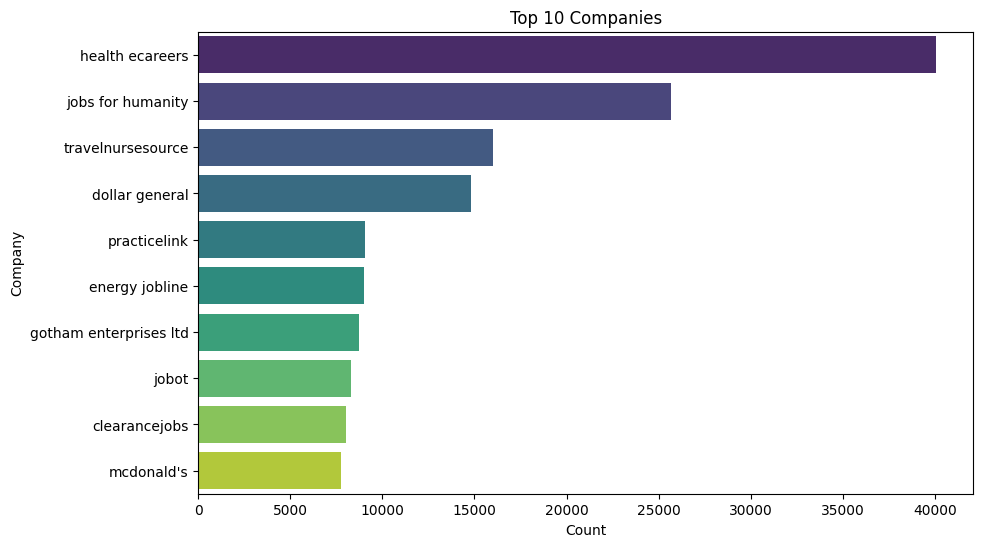

In [13]:
# Top 10 companies
top_companies = merged_data['company'].value_counts().nlargest(10)  
plt.figure(figsize=(10, 6))  
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')  
plt.title('Top 10 Companies')  
plt.xlabel('Count') 
plt.ylabel('Company')  
plt.show()  


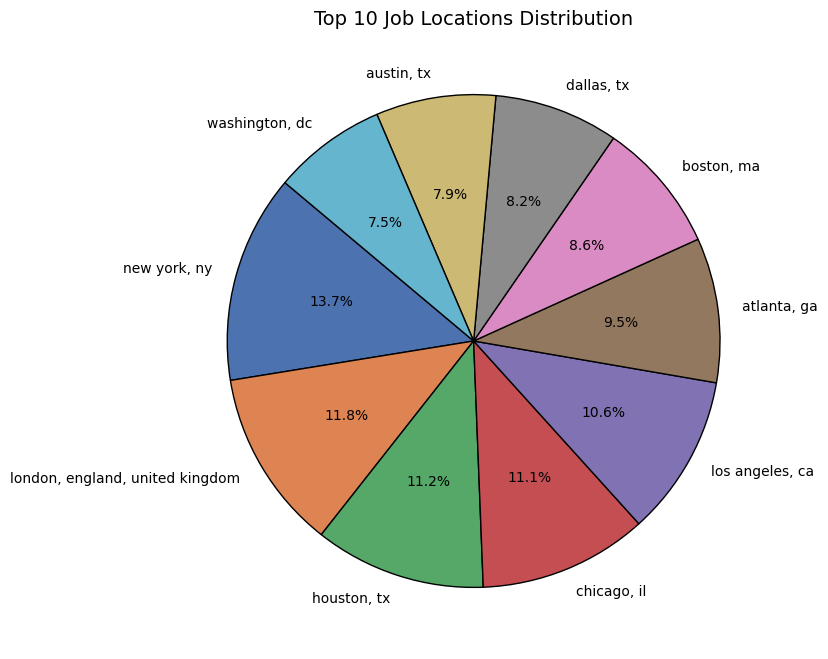

In [14]:
# Top 10 job locations
top_locations = merged_data['job_location'].value_counts().nlargest(10)
colors = sns.color_palette('deep', len(top_locations))
 
plt.figure(figsize=(8, 8)) 
plt.pie(top_locations.values, labels=top_locations.index, autopct='%1.1f%%', 
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Top 10 Job Locations Distribution', fontsize=14)  
plt.show() 


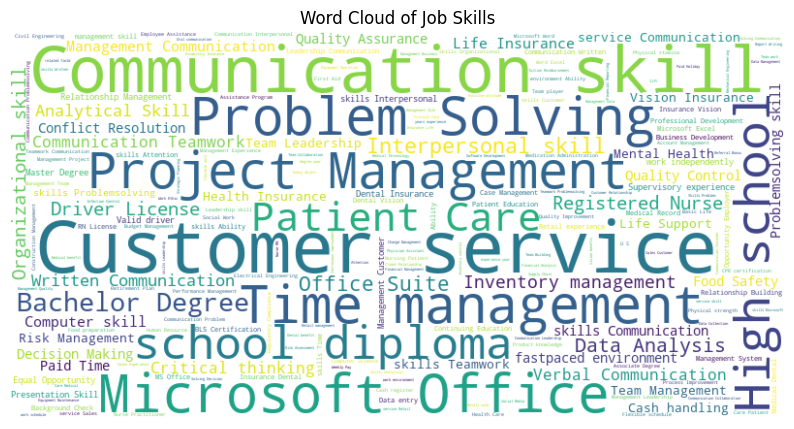

In [15]:
# Word cloud
all_skills = [skill for sublist in merged_data['job_skills'].dropna() for skill in sublist]  
skills_text = ' '.join(all_skills)  
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)  
plt.figure(figsize=(10, 6))  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off')  
plt.title('Word Cloud of Job Skills')  
plt.show() 

In [ ]:
merged_data.to_csv('processed_data_linkedin.csv', index=False)